<a href="https://colab.research.google.com/github/AhmedCoolProjects/ML/blob/main/FakeNewsDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import used packages

In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

In [ ]:
# create a DataFrame
df = pd.read_csv("/content/news.csv")
# display the first 5 rows
df.head()

,Unnamed: 0,title_txt,label
0,0,hous dem aid didnt even see comey letter jason...,1.0
1,1,flynn hillari clinton big woman campu breitba...,0.0
2,2,truth might get fire truth might get fire octo...,1.0
3,3,15 civilian kill singl us airstrik identifi vi...,1.0
4,4,iranian woman jail fiction unpublish stori wom...,1.0


In [56]:
# rename the title_text column
df.rename(columns={"title_txt":"text"}, inplace = True)
# delete the Unnamed column
df.drop(df.columns[df.columns.str.contains("Unnamed", case = False)], axis = 1, inplace = True)

In [ ]:
df.head()

,text,label
0,hous dem aid didnt even see comey letter jason...,1.0
1,flynn hillari clinton big woman campu breitba...,0.0
2,truth might get fire truth might get fire octo...,1.0
3,15 civilian kill singl us airstrik identifi vi...,1.0
4,iranian woman jail fiction unpublish stori wom...,1.0


In [64]:
df.dropna(inplace = True)

In [65]:
# get shape of the DataFrame
df.shape

(9665, 2)

In [66]:
# split to random train and test subsets.
X_train, X_test, Y_train, Y_test = train_test_split(df['text'], df['label'], test_size = 0.2, random_state = 7)

In [67]:
# create a TfidfVectorizer object
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english', max_df = 0.7)
# fit and transform train set features
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
# transform test set features
tfidf_test = tfidf_vectorizer.transform(X_test)

In [68]:
# create a PassiveAggressiveClassifier object
pac = PassiveAggressiveClassifier(max_iter = 50)
# train the model using the TF-IDF train set features
pac.fit(tfidf_train, Y_train)

PassiveAggressiveClassifier(max_iter=50)

In [69]:
# make predictions on test set
Y_pred = pac.predict(tfidf_test)
# calculate accuracy of our predictions
accuracy = accuracy_score(Y_test, Y_pred)
# print accuracy
print(f"Accuracy: {round(accuracy*100, 2)}%")

Accuracy: 96.28%


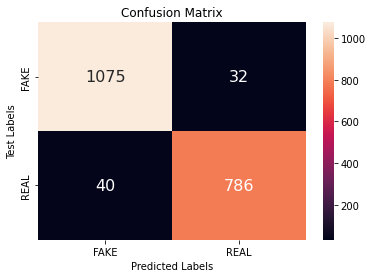

In [75]:
# create a confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
# create a dataframe from the confusion matrix
cm_df = pd.DataFrame(cm, ['FAKE', 'REAL'], ['FAKE', 'REAL'])
# create heatmap of the confusion matrix
ax = plt.axes()
sn.heatmap(cm_df, annot = True, annot_kws={"size":16}, fmt="g", ax = ax)
# plot the confusion matrix
ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("Test Labels")
plt.show()